<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Импорты-библиотек" data-toc-modified-id="Импорты-библиотек-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Импорты библиотек</a></span><ul class="toc-item"><li><span><a href="#Пропуски" data-toc-modified-id="Пропуски-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Пропуски</a></span></li><li><span><a href="#Дубликаты" data-toc-modified-id="Дубликаты-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Дубликаты</a></span></li></ul></li><li><span><a href="#Распределение-по-классам" data-toc-modified-id="Распределение-по-классам-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Распределение по классам</a></span></li><li><span><a href="#Токенизация.-Распределение-по-токенам" data-toc-modified-id="Токенизация.-Распределение-по-токенам-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Токенизация. Распределение по токенам</a></span><ul class="toc-item"><li><span><a href="#Препроцессинг" data-toc-modified-id="Препроцессинг-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Препроцессинг</a></span></li><li><span><a href="#Отдельные-слова" data-toc-modified-id="Отдельные-слова-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Отдельные слова</a></span></li><li><span><a href="#Биграммы" data-toc-modified-id="Биграммы-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Биграммы</a></span></li></ul></li><li><span><a href="#Токеназация.-Распределение-по-токенам.-Только-токсичная-часть-датасета" data-toc-modified-id="Токеназация.-Распределение-по-токенам.-Только-токсичная-часть-датасета-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Токеназация. Распределение по токенам. Только токсичная часть датасета</a></span><ul class="toc-item"><li><span><a href="#Отдельные-слова" data-toc-modified-id="Отдельные-слова-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Отдельные слова</a></span></li><li><span><a href="#Биграммы" data-toc-modified-id="Биграммы-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Биграммы</a></span></li></ul></li></ul></div>

Датасет взят по ссылке:

https://www.kaggle.com/c/jigsaw-multilingual-toxic-comment-classification/data

### Импорты библиотек

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np
from tqdm import tqdm
from scipy import stats as st


#nltk
import nltk
from nltk.corpus import stopwords as nltk_stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#textx
import re
import spacy

#sklearn
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer



#pickle
import pickle

In [2]:
data= pd.read_csv('datasets/jigsaw-toxic-comment-train.csv')

In [227]:
pd.get_option("max_colwidth")

50

In [228]:
pd.set_option("max_colwidth", 80)

In [280]:
pd.set_option("max_colwidth", None)
data[['id','comment_text']].head()

,id,comment_text
0,0000997932d777bf,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"
1,000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)"
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info."
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport """
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember what page that's on?"


In [5]:
data.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,223549.000000,223549.000000,223549.000000,223549.000000,223549.000000,223549.000000
mean,0.095657,0.008777,0.054306,0.003082,0.050566,0.009470
std,0.294121,0.093272,0.226621,0.055431,0.219110,0.096852
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Пропуски

In [6]:
data.isnull().mean()

id               0.0
comment_text     0.0
toxic            0.0
severe_toxic     0.0
obscene          0.0
threat           0.0
insult           0.0
identity_hate    0.0
dtype: float64

Пропусков нет.

#### Дубликаты

In [7]:
data.duplicated().sum()

0

Дубликаты отсутствуют

### Распределение по классам

Напишем функции для построения чатлото

In [16]:
data['toxic'].value_counts(normalize=True)

0    0.904343
1    0.095657
Name: toxic, dtype: float64

In [64]:
#Напишем функции и всмомогателные параметры для определения распределния комментариев
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)
# Creating color parameters
colors = ( "purple", "red")

# Creating explode data
explode = (0.3, 0.0)

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }

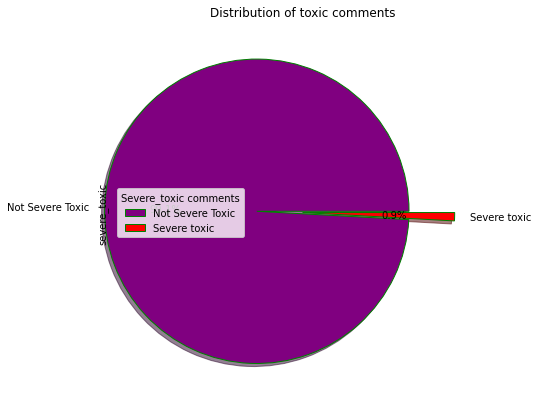

In [66]:
fig, ax = plt.subplots(figsize =(15, 7))
data['severe_toxic'].value_counts(normalize=True).plot.pie(autopct = '%1.1f%%',
                                  explode = explode, shadow = True,labels = ['Not Severe Toxic','Severe toxic'],colors=colors, wedgeprops = wp)
ax.legend(title="Severe_toxic comments",loc ="center left",)
ax.set_title("Distribution of severe toxic comments")
plt.show()

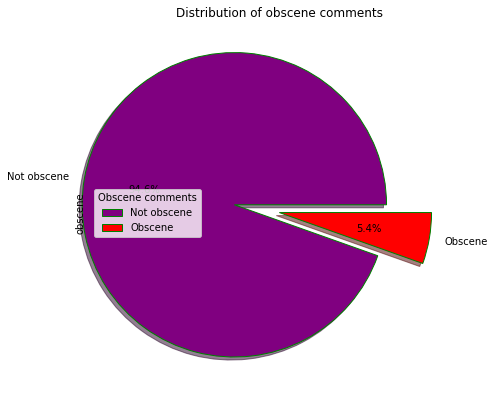

In [67]:
#Распределение непристойных комментариев
fig, ax = plt.subplots(figsize =(15, 7))
data['obscene'].value_counts(normalize=True).plot.pie(autopct = '%1.1f%%',
                                  explode = explode, shadow = True,labels = ['Not obscene','Obscene'],colors=colors, wedgeprops = wp)
ax.legend(title="Obscene comments",loc ="center left",)
ax.set_title("Distribution of obscene comments")
plt.show()

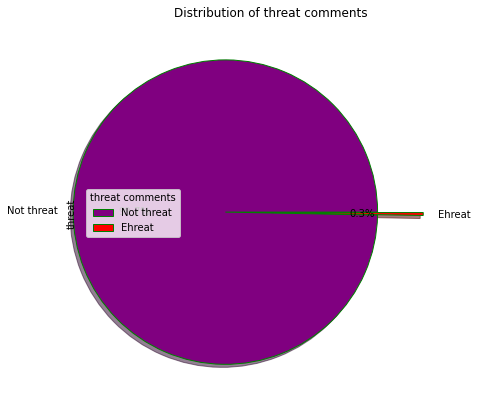

In [69]:
fig, ax = plt.subplots(figsize =(15, 7))
data['threat'].value_counts(normalize=True).plot.pie(autopct = '%1.1f%%',
                                  explode = explode, shadow = True,labels = ['Not threat','Threat'],colors=colors, wedgeprops = wp)
ax.legend(title="threat comments",loc ="center left",)
ax.set_title("Distribution of threat comments")
plt.show()

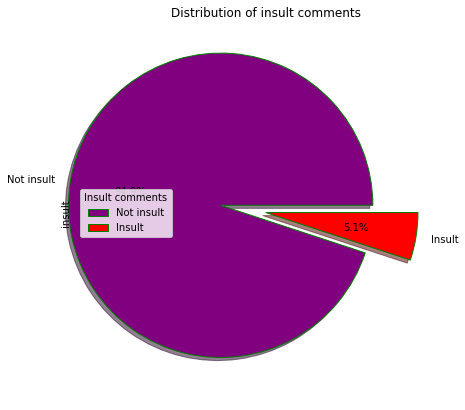

In [70]:
fig, ax = plt.subplots(figsize =(15, 7))
data['insult'].value_counts(normalize=True).plot.pie(autopct = '%1.1f%%',
                                  explode = explode, shadow = True,labels = ['Not insult','Insult'],colors=colors, wedgeprops = wp)
ax.legend(title="Insult comments",loc ="center left",)
ax.set_title("Distribution of insult comments")
plt.show()

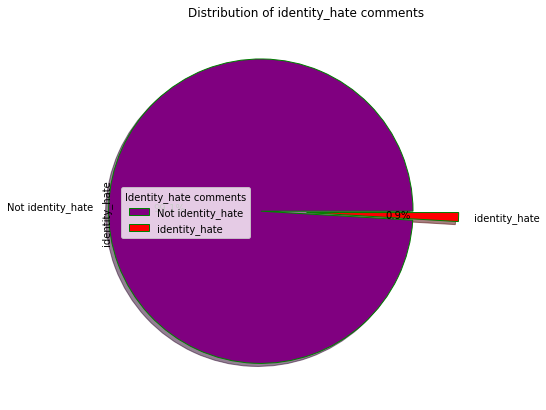

In [72]:
fig, ax = plt.subplots(figsize =(15, 7))
data['identity_hate'].value_counts(normalize=True).plot.pie(autopct = '%1.1f%%',
                                  explode = explode, shadow = True,labels = ['Not identity_hate','identity_hate'],colors=colors, wedgeprops = wp)
ax.legend(title="Identity_hate comments",loc ="center left",)
ax.set_title("Distribution of identity_hate comments")
plt.show()

Таким образом, токсичных комментариев в целом немного. 

### Токенизация. Распределение по токенам

In [82]:
corpus = data['comment_text'].values

In [99]:
#Напишем фукнцию лемматизации
def lemmatization(texts):
    nlp = spacy.load("en_core_web_sm")
    texts_out = []
    for text in tqdm(texts):
        doc = nlp(text)
        new_text = []
        for token in doc:
            new_text.append(token.lemma_)
        final = " ".join(new_text)
        texts_out.append(final)
    return (texts_out)

In [103]:
lemmatized_texts=lemmatization(corpus)
print(corpus[0:10])

100%|██████████████████████████████████████████████████████████████████████████| 223549/223549 [46:54<00:00, 79.43it/s]

["Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"
 "D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"
 "Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info."
 '"\nMore\nI can\'t make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of ""types of accidents""  -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on refe

In [105]:
with open("lemmatized_texts.pkl", "wb") as f:
    pickle.dump(lemmatized_texts, f)

In [173]:
with open("lemmatized_texts.pkl", "rb") as f:
    lemmatized_texts = pickle.load(f)

In [175]:
lemmatized_texts[0:10]

['Explanation \n why the edit make under my username Hardcore Metallica Fan be revert ? they be not vandalism , just closure on some gas after I vote at New York Dolls FAC . and please do not remove the template from the talk page since I be retire now.89.205.38.27',
 "D'aww ! he match this background colour I be seemingly stuck with . thank .   ( talk ) 21:51 , January 11 , 2016 ( UTC )",
 'hey man , I be really not try to edit war . it be just that this guy be constantly remove relevant information and talk to I through edit instead of my talk page . he seem to care more about the formatting than the actual info .',
 '" \n More \n I can not make any real suggestion on improvement - I wonder if the section statistic should be later on , or a subsection of " " type of accident " "   -i think the reference may need tidy so that they be all in the exact same format ie date format etc . I can do that later on , if no - one else do first - if you have any preference for format style on ref

In [80]:
def clear_text(text):
    return " ".join(re.sub(r'[^a-zA-Z ]', ' ', text).split())

In [ ]:
clear_text

#### Препроцессинг

In [250]:
stop_words = set(stopwords.words('english'))

In [251]:
preprocessed_corpus=[]

In [253]:
for i in tqdm(range(len(lemmatized_texts))):
    preprocessed_corpus.append((clear_text(str.lower(lemmatized_texts[i]))))

100%|███████████████████████████████████████████████████████████████████████| 223549/223549 [00:03<00:00, 60658.70it/s]


#### Отдельные слова 

In [254]:
%%time
count_vect = CountVectorizer(stop_words=stop_words) 
bow = count_vect.fit_transform(preprocessed_corpus[0:60000]) 

print("Размер мешка без учёта стоп-слов:", bow.shape)

Размер мешка без учёта стоп-слов: (60000, 87481)
Wall time: 2.78 s


In [255]:
%%time
word_list=count_vect.get_feature_names() 
count_list = bow.toarray().sum(axis=0)

Wall time: 1min 31s


In [256]:
x = dict(zip(word_list,count_list))
g={k: v for k, v in sorted(x.items(), key=lambda item: item[1],reverse=True)}
result_series = pd.Series(g)

In [257]:
result_series[0:20]

article      27363
page         21856
wikipedia    18197
talk         15231
would        13472
edit         13311
use          12759
one          11772
make         11465
please       11194
like         10869
see          10351
say           9592
know          9228
think         9207
thank         8868
source        8818
go            8338
get           7823
also          7653
dtype: int64

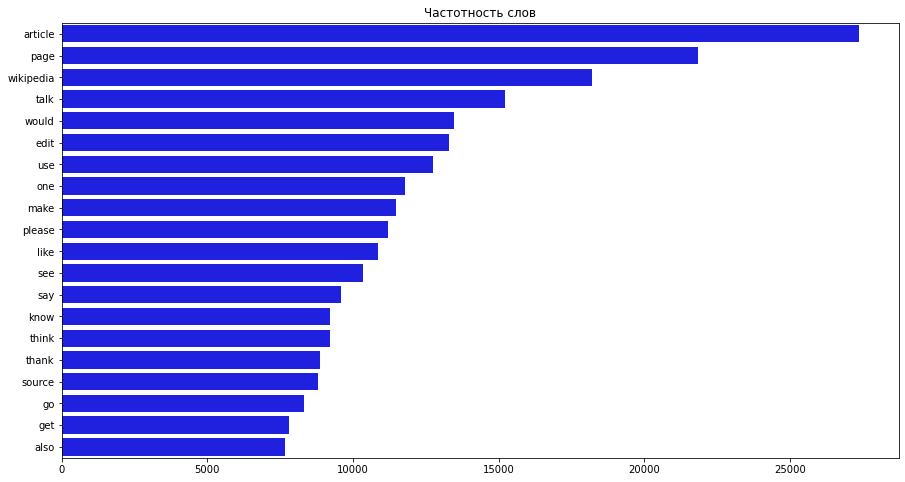

In [258]:
plt.figure(figsize=(15,8))
sns.barplot(y=result_series[0:20].index, x=result_series[0:20].values,color='blue')
plt.title("Частотность слов")
plt.show()

#### Биграммы

In [261]:
%%time
count_vect = CountVectorizer(ngram_range=(2, 2),stop_words=stop_words) 
bow = count_vect.fit_transform(preprocessed_corpus[0:50000]) 

print("Размер мешка без учёта стоп-слов:", bow.shape)

Размер мешка без учёта стоп-слов: (50000, 911556)
Wall time: 5.37 s


In [262]:
%%time
word_list=count_vect.get_feature_names() 
count_list = bow.toarray().sum(axis=0)

MemoryError: Unable to allocate 340. GiB for an array with shape (50000, 911556) and data type int64

In [ ]:
x = dict(zip(word_list,count_list))
{k: v for k, v in sorted(x.items(), key=lambda item: item[1],reverse=True)}
g={k: v for k, v in sorted(x.items(), key=lambda item: item[1],reverse=True)}
result_series = pd.Series(g)

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(y=result_series[0:20].index, x=result_series[0:20].values,color='blue')
plt.title("Частотность слов")
plt.show()

### Токеназация. Распределение по токенам. Только токсичная часть датасета

In [266]:
#Загрузим только токсичную часть датасета
with open("only_bad_lemmatized_texts.pkl", "rb") as f:
    only_bad_lemmatized_texts = pickle.load(f)

In [267]:
preprocessed_bad_corpus=[]

In [268]:
for i in tqdm(range(len(only_bad_lemmatized_texts))):
    preprocessed_bad_corpus.append((clear_text(str.lower(only_bad_lemmatized_texts[i]))))

100%|█████████████████████████████████████████████████████████████████████████| 22468/22468 [00:00<00:00, 92327.01it/s]


#### Отдельные слова 

In [269]:
%%time
count_vect = CountVectorizer(stop_words=stop_words) 
bow = count_vect.fit_transform(preprocessed_bad_corpus) 

print("Размер мешка без учёта стоп-слов:", bow.shape)

Размер мешка без учёта стоп-слов: (22468, 35960)
Wall time: 862 ms


In [270]:
%%time
word_list=count_vect.get_feature_names() 
count_list = bow.toarray().sum(axis=0)

Wall time: 2.86 s


In [271]:
x = dict(zip(word_list,count_list))
g={k: v for k, v in sorted(x.items(), key=lambda item: item[1],reverse=True)}
result_series_bad = pd.Series(g)

In [272]:
result_series_bad[0:20]

fuck         16953
nigger        6187
suck          5918
go            5379
like          5196
shit          5021
wikipedia     4560
fucking       4435
ass           4142
faggot        4078
get           3989
die           3969
hate          3927
gay           3678
bitch         3588
page          3527
dick          3430
know          3316
make          2787
people        2692
dtype: int64

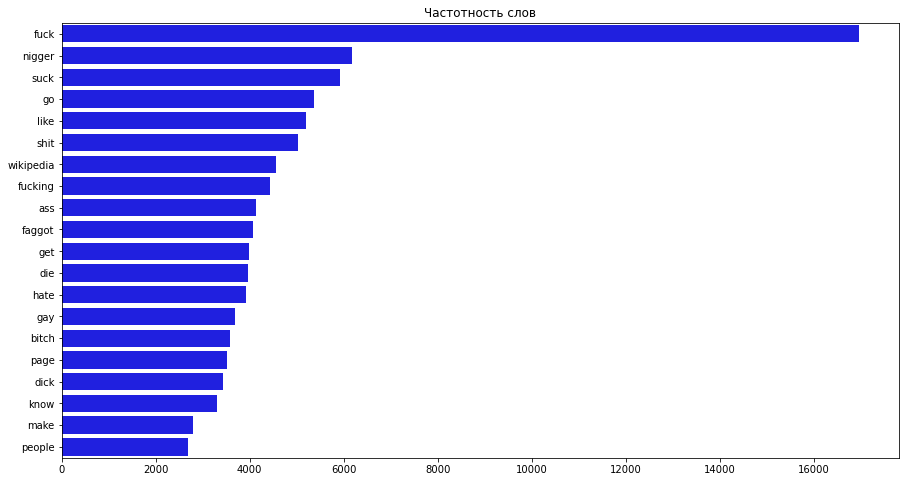

In [273]:
plt.figure(figsize=(15,8))
sns.barplot(y=result_series_bad[0:20].index, x=result_series_bad[0:20].values,color='blue')
plt.title("Частотность слов")
plt.show()

#### Биграммы

In [278]:
%%time
count_vect = CountVectorizer(ngram_range=(2, 2),stop_words=stop_words) 
bow = count_vect.fit_transform(preprocessed_bad_corpus) 

print("Размер мешка без учёта стоп-слов:", bow.shape)

Размер мешка без учёта стоп-слов: (22468, 281473)
Wall time: 1.5 s


In [279]:
%%time
word_list=count_vect.get_feature_names() 
count_list = bow.toarray().sum(axis=0)

MemoryError: Unable to allocate 47.1 GiB for an array with shape (22468, 281473) and data type int64

In [276]:
x = dict(zip(word_list,count_list))
{k: v for k, v in sorted(x.items(), key=lambda item: item[1],reverse=True)}
g={k: v for k, v in sorted(x.items(), key=lambda item: item[1],reverse=True)}
result_series = pd.Series(g)

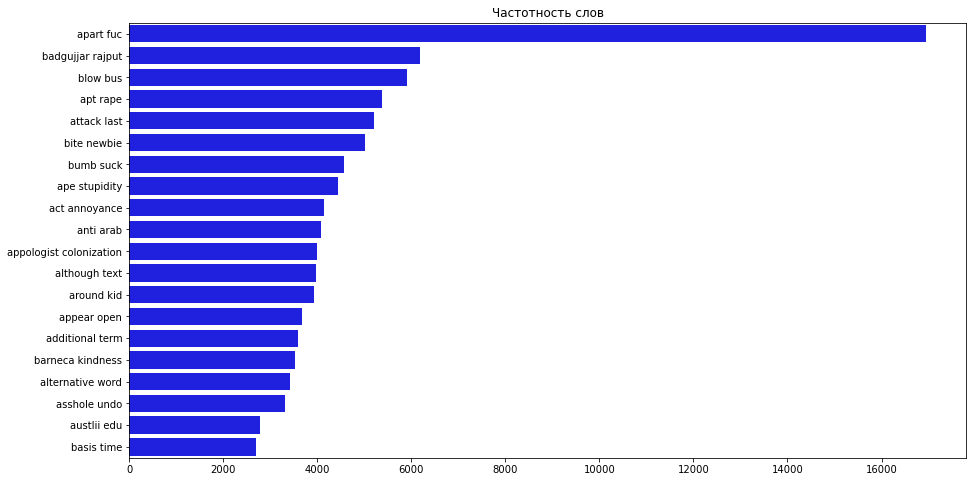

In [277]:
plt.figure(figsize=(15,8))
sns.barplot(y=result_series[0:20].index, x=result_series[0:20].values,color='blue')
plt.title("Частотность слов")
plt.show()